In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Load the processed dataset
data = pd.read_csv('energy-consumption.csv')

# Define energy consumption categories based on specified ranges
def categorize_consumption(consumption):
    if consumption < 200:
        return 'Very Low'
    elif 200 <= consumption < 400:
        return 'Low'
    elif 400 <= consumption < 600:
        return 'Medium'
    else:
        return 'High'

In [3]:
# Create a new column for categorized energy consumption
data['Consumption Category'] = data['energy_consumption'].apply(categorize_consumption)

# Feature selection: Choose relevant features for prediction
features = ['temperature', 'humidity', 'hour', 'day', 'month']
target = 'energy_consumption'

# Prepare the feature matrix (X) and target vector (y)
X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

In [4]:
# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [5]:
# Print evaluation metrics and feature importances
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'Pseudo Accuracy (R² as percentage): {max(r2 * 100, 0):.2f}%')

# Print feature importances
feature_importance = pd.DataFrame({'feature': features, 'importance': best_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance)

Mean Squared Error: 91382.39
R^2 Score: -0.07
Pseudo Accuracy (R² as percentage): 0.00%

Feature Importances:
       feature  importance
0  temperature    0.319596
1     humidity    0.261789
3          day    0.159128
2         hour    0.146619
4        month    0.112868


In [6]:
# Function to predict energy consumption category based on user input
def predict_consumption_category(input_data):
    predicted_consumption = best_model.predict([input_data])[0]
    category = categorize_consumption(predicted_consumption)
    return predicted_consumption, category

# User input for feature values
print("Enter the following feature values:")
try:
    temperature = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    hour = int(input("Hour (0-23): "))
    day = int(input("Day (1-31): "))
    month = int(input("Month (1-12): "))

    # Make prediction
    input_data = [temperature, humidity, hour, day, month]
    predicted_consumption, category = predict_consumption_category(input_data)

    print(f"\nPredicted Energy Consumption: {predicted_consumption:.2f}")
    print(f"Consumption Category: {category}")

except ValueError:
    print("Invalid input. Please enter numeric values for temperature, humidity, hour, day, and month.")


Enter the following feature values:

Predicted Energy Consumption: 488.52
Consumption Category: Medium


c:\Users\annbl\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


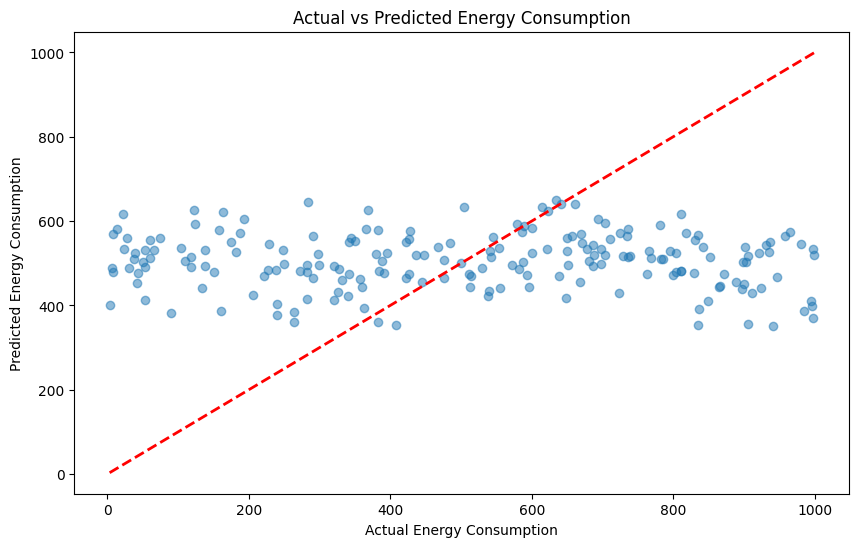

In [8]:
# Visualize actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.show()